# Problem Statement: **Hyperparameter Tuning for AtliQ’s Fashion Item Classifier**

### AtliQ Fashion wants to develop a neural network to classify fashion items using the FashionMNIST dataset. Your task is to optimize the neural network's performance by fine-tuning its hyperparameters. We will be using **FashionMNIST** dataset but since the dataset is large, we will work with only a subset to ensure that the solution is computationally feasible.

**References:**

* transforms.Compose (PyTorch): [Link](https://pytorch.org/vision/master/generated/torchvision.transforms.Compose.html)
* Optuna (Hyperparameter Optimization Framework) [Link](https://optuna.readthedocs.io/en/stable/)

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import optuna
import random

# Check if CUDA (GPU) is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda




---



**Dataset Overview**

* Dataset: FashionMNIST
* Classes: 10 (e.g., T-shirts, trousers, shoes)
* Training Images: Subset of 10,000 (randomly sampled from 60,000)
* Test Images: Subset of 2,000 (randomly sampled from 10,000)



---



**Step1**: Load and Sample the Dataset

* Load the FashionMNIST dataset using torchvision.datasets.
* Sample 10,000 images for training and 2,000 images for testing.
* Normalize the pixel values to the range [-1, 1].
* Create PyTorch DataLoaders for the training and test sets.

In [14]:
# Transform: Normalize and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Centers the pixel values around 0 and scales them to [-1, 1]
])

# Load FashionMNIST dataset

dataset = datasets.FashionMNIST(root='./data', train=True, download=False, transform=transform)

test_dataset = datasets.FashionMNIST(root='./data',train=False,download=False,transform=transform)




# Sample the datset

train_subset_size =1000
test_subset_size = 200


**Step2**: Create Dataloaders

* batch size = 32


In [15]:
train_subset, _ = random_split(dataset, [train_subset_size, len(dataset) - train_subset_size])
test_subset, _ = random_split(test_dataset, [test_subset_size, len(test_dataset) - test_subset_size])

In [16]:
batch_size = 32
train_loader = DataLoader(train_subset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_subset,batch_size=batch_size,shuffle=True)

In [17]:
print(f"Training data size: {len(train_subset)}")
print(f"Testing data size: {len(test_subset)}")

Training data size: 1000
Testing data size: 200




---



**Step3**: Define the Neural Network

* Create a fully connected feed-forward neural network (no CNN).

Structure:
* Input layer: 784 neurons (28x28 image flattened).
* 1st hidden layer: 128 neurons with ReLU activation.
* 2nd hidden layer: 64 neurons with ReLU activation.
* Output layer: 10 neurons (one for each class) with Softmax activation.

Use `nn.Sequential`

In [18]:
class FashionNN(nn.Module):
    def __init__(self):
        super(FashionNN, self).__init__()
        self.network = nn.Sequential(
            # Flatten the input tensor
            nn.Flatten(),
            # Input layer (784)
            nn.Linear(28*28,128),
            # Activation
            nn.ReLU(),
            # Hidden layer 1
            nn.Linear(128,64),
            # Activation
            nn.ReLU(),
            # Output layer (10 classes)
            nn.Linear(64,10),
            # Softmax for probabilities
            nn.Softmax(dim=0)
        )

    def forward(self, x):
        return self.network(x)

model = FashionNN()
print(model)

loss_fn = nn.CrossEntropyLoss()

FashionNN(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
    (6): Softmax(dim=0)
  )
)




---



**Step 3**: Train the Base Model

Instructions:

Set the following base hyperparameters:
* Loss function: Cross Entropy Loss
* Learning rate: 0.01
* Batch size: 32
* Optimizer: SGD
* Epochs: 100

Train the model and record the training/validation accuracy and loss.


In [19]:
# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

# Training loop
num_epochs =100
for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()  # Set model to training mode
    for images, labels in train_loader:
        # Zero gradients
        optimizer.zero_grad()
        # Forward pass
        predictions = model(images)
        loss = loss_fn(predictions,labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Append the training loss
        train_loss+=loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss/len(train_loader):.4f}")


Epoch 1/100, Loss: 2.3026
Epoch 2/100, Loss: 2.3024
Epoch 3/100, Loss: 2.3024
Epoch 4/100, Loss: 2.3023
Epoch 5/100, Loss: 2.3021
Epoch 6/100, Loss: 2.3021
Epoch 7/100, Loss: 2.3020
Epoch 8/100, Loss: 2.3018
Epoch 9/100, Loss: 2.3018
Epoch 10/100, Loss: 2.3016
Epoch 11/100, Loss: 2.3016
Epoch 12/100, Loss: 2.3016
Epoch 13/100, Loss: 2.3015
Epoch 14/100, Loss: 2.3013
Epoch 15/100, Loss: 2.3012
Epoch 16/100, Loss: 2.3011
Epoch 17/100, Loss: 2.3011
Epoch 18/100, Loss: 2.3010
Epoch 19/100, Loss: 2.3009
Epoch 20/100, Loss: 2.3007
Epoch 21/100, Loss: 2.3008
Epoch 22/100, Loss: 2.3006
Epoch 23/100, Loss: 2.3005
Epoch 24/100, Loss: 2.3003
Epoch 25/100, Loss: 2.3003
Epoch 26/100, Loss: 2.3000
Epoch 27/100, Loss: 2.2999
Epoch 28/100, Loss: 2.3000
Epoch 29/100, Loss: 2.2998
Epoch 30/100, Loss: 2.2998
Epoch 31/100, Loss: 2.2996
Epoch 32/100, Loss: 2.2993
Epoch 33/100, Loss: 2.2991
Epoch 34/100, Loss: 2.2991
Epoch 35/100, Loss: 2.2990
Epoch 36/100, Loss: 2.2989
Epoch 37/100, Loss: 2.2986
Epoch 38/1



---



**Step 4**: Perform Hyperparameter Tuning
Instructions:

**Grid Search:**

Hyperparameters:
* Learning rate: [0.001, 0.01, 0.1]
* Batch size: [32, 64]
* Evaluate all combinations systematically.

In [22]:
# Define grid search parameters
learning_rates =[0.001,0.01,0.1]
batch_sizes =[32,64]

# Train and evaluate for all combinations
best_loss = float('inf')
best_params = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        optimizer = optim.SGD(model.parameters(),lr=lr)
        train_loader = DataLoader(train_subset,batch_size=batch_size,shuffle=True)
        train_loss = 0.0
        for images, labels in train_loader:
            # Code Here
            optimizer.zero_grad()
            predictions=model(images)
            loss=loss_function(predictions,labels)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()




        avg_loss = train_loss / len(train_loader)
        print(f"LR: {lr}, Batch size: {batch_size}, Loss: {avg_loss:.4f}")
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_params = {'lr': lr, 'batch_size': batch_size}

print(f"Best Params (Grid Search): {best_params}")


LR: 0.001, Batch size: 32, Loss: 2.2633
LR: 0.001, Batch size: 64, Loss: 2.2826
LR: 0.01, Batch size: 32, Loss: 2.2627
LR: 0.01, Batch size: 64, Loss: 2.2819
LR: 0.1, Batch size: 32, Loss: 2.2506
LR: 0.1, Batch size: 64, Loss: 2.2691
Best Params (Grid Search): {'lr': 0.1, 'batch_size': 32}




---



**Random Search:**

Randomly select hyperparameters for 5 trials from:
* Learning rate: [0.0001, 0.001, 0.01, 0.1]
* Batch size: [16, 32, 64, 128]

In [23]:
# Define random search space
learning_rates =[0.0001,0.001,0.01,0.1]
batch_sizes =[16,32,64,128]
# Randomly sample 5 combinations
for _ in range(5):
    lr = random.choice(learning_rates)
    batch_size = random.choice(batch_sizes)
    for batch_size in batch_sizes:
        optimizer = optim.SGD(model.parameters(),lr=lr)
        train_loader =DataLoader(train_subset,batch_size=batch_size,shuffle=True)
        train_loss = 0.0
        for images, labels in train_loader:
            # Code Here
            optimizer.zero_grad()
            predicted=model(images)
            loss=loss_function(predicted,labels)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()
            
        





        avg_loss = train_loss / len(train_loader)
        print(f"LR: {lr}, Batch size: {batch_size}, Loss: {avg_loss:.4f}")
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_params = {'lr': lr, 'batch_size': batch_size}

print(f"Best Params (Random Search): {best_params}")


LR: 0.1, Batch size: 16, Loss: 2.1499
LR: 0.1, Batch size: 32, Loss: 2.1816
LR: 0.1, Batch size: 64, Loss: 2.2297
LR: 0.1, Batch size: 128, Loss: 2.2649
LR: 0.01, Batch size: 16, Loss: 2.0783
LR: 0.01, Batch size: 32, Loss: 2.1656
LR: 0.01, Batch size: 64, Loss: 2.2286
LR: 0.01, Batch size: 128, Loss: 2.2632
LR: 0.0001, Batch size: 16, Loss: 2.0732
LR: 0.0001, Batch size: 32, Loss: 2.1611
LR: 0.0001, Batch size: 64, Loss: 2.2284
LR: 0.0001, Batch size: 128, Loss: 2.2634
LR: 0.001, Batch size: 16, Loss: 2.0768
LR: 0.001, Batch size: 32, Loss: 2.1587
LR: 0.001, Batch size: 64, Loss: 2.2263
LR: 0.001, Batch size: 128, Loss: 2.2630
LR: 0.001, Batch size: 16, Loss: 2.0857
LR: 0.001, Batch size: 32, Loss: 2.1651
LR: 0.001, Batch size: 64, Loss: 2.2256
LR: 0.001, Batch size: 128, Loss: 2.2636
Best Params (Random Search): {'lr': 0.0001, 'batch_size': 16}




---



**Bayesian Optimization (Optuna):**

Use optuna.create_study to dynamically suggest:
* Learning rate: Range (0.0001, 0.1)
* Hidden layer neurons: Range (32, 256)

In [25]:
import optuna

def objective(trial):
    # Suggest parameters
    lr = trial.suggest_float('lr', 0.0001, 0.1)
    neurons = trial.suggest_int('neurons', 32, 256)

    # Modify model
    model = nn.Sequential(
        nn.Linear(28*28, neurons),
        nn.ReLU(),
        nn.Linear(neurons, 10),
        nn.Softmax(dim=1)
    )
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_function = nn.CrossEntropyLoss()

    # Train model
    model.train()
    num_epochs = 5  # Use a small number of epochs for faster Optuna runs
    for epoch in range(num_epochs):
        for images, labels in train_loader:
            # Flatten images
            images = images.view(images.size(0), -1)

            # Forward pass
            predictions = model(images)
            loss = loss_function(predictions, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate on the validation set
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            # Flatten images
            images = images.view(images.size(0), -1)

            # Forward pass
            predictions = model(images)
            loss = loss_function(predictions, labels)
            total_loss += loss.item()

    avg_loss = total_loss / len(test_loader)  # Average loss over all batches
    return avg_loss  # Return loss for Optuna to minimize

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print(f"Best Params (Optuna): {study.best_params}")


[I 2025-01-30 20:46:09,966] A new study created in memory with name: no-name-7d6556a5-0236-44a9-a5d1-f296b6ba2fda
[I 2025-01-30 20:46:10,908] Trial 0 finished with value: 2.258335828781128 and parameters: {'lr': 0.038411150763953635, 'neurons': 130}. Best is trial 0 with value: 2.258335828781128.
[I 2025-01-30 20:46:11,863] Trial 1 finished with value: 2.273181234087263 and parameters: {'lr': 0.03472609745485195, 'neurons': 224}. Best is trial 0 with value: 2.258335828781128.
[I 2025-01-30 20:46:12,802] Trial 2 finished with value: 2.2738376004355296 and parameters: {'lr': 0.03804520053371584, 'neurons': 64}. Best is trial 0 with value: 2.258335828781128.
[I 2025-01-30 20:46:13,814] Trial 3 finished with value: 2.241334472383772 and parameters: {'lr': 0.046091374304941986, 'neurons': 112}. Best is trial 3 with value: 2.241334472383772.
[I 2025-01-30 20:46:14,748] Trial 4 finished with value: 2.1455089364733015 and parameters: {'lr': 0.07826839133206026, 'neurons': 255}. Best is trial 4

Best Params (Optuna): {'lr': 0.07826839133206026, 'neurons': 255}




---



**Step5**: Evaluate and Compare the Model

* Train the model using the best hyperparameters from each method (Grid Search, Random Search, Optuna).
* num_epochs = 50
* Evaluate all models on the test set.
* Plot training/validation accuracy and loss for the best model.


In [30]:
# Train model with best params and evaluate
model = FashionNN()  # Re-initialize the model
optimizer = optim.SGD(model.parameters(),lr=best_params['lr'])
train_loader = DataLoader(train_subset,batch_size=best_params['batch_size'],shuffle=True)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Training loop
num_epochs = 50 # Re-train with best parameters
for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()  # Set model to training mode
    for images, labels in train_loader:
        # Clear previous gradients
        optimizer.zero_grad()
        predictions =model(images)               # Forward pass

        loss =loss_function(predictions,labels)                       # Compute loss
        # Backpropagation
        loss.backward()
        # Update weights
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss/len(train_loader):.4f}")


# Evaluate on test set
model.eval()  # Set model to evaluation mode
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for evaluation
    for images, labels in test_loader:
        predictions =model(images)         # Forward pass
        loss =loss_function(predictions,labels)                   # Compute loss
        test_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(predictions, 1)  # Get class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print test loss and accuracy
print(f"Test Loss: {test_loss/len(test_loader):.4f}")
print(f"Test Accuracy: {100 * correct / total:.2f}%")



Epoch 1/50, Loss: 2.3036
Epoch 2/50, Loss: 2.3036
Epoch 3/50, Loss: 2.3036
Epoch 4/50, Loss: 2.3036
Epoch 5/50, Loss: 2.3036
Epoch 6/50, Loss: 2.3036
Epoch 7/50, Loss: 2.3036
Epoch 8/50, Loss: 2.3035
Epoch 9/50, Loss: 2.3036
Epoch 10/50, Loss: 2.3036
Epoch 11/50, Loss: 2.3036
Epoch 12/50, Loss: 2.3036
Epoch 13/50, Loss: 2.3035
Epoch 14/50, Loss: 2.3036
Epoch 15/50, Loss: 2.3036
Epoch 16/50, Loss: 2.3035
Epoch 17/50, Loss: 2.3035
Epoch 18/50, Loss: 2.3035
Epoch 19/50, Loss: 2.3035
Epoch 20/50, Loss: 2.3035
Epoch 21/50, Loss: 2.3035
Epoch 22/50, Loss: 2.3035
Epoch 23/50, Loss: 2.3035
Epoch 24/50, Loss: 2.3035
Epoch 25/50, Loss: 2.3035
Epoch 26/50, Loss: 2.3035
Epoch 27/50, Loss: 2.3035
Epoch 28/50, Loss: 2.3035
Epoch 29/50, Loss: 2.3035
Epoch 30/50, Loss: 2.3035
Epoch 31/50, Loss: 2.3035
Epoch 32/50, Loss: 2.3035
Epoch 33/50, Loss: 2.3035
Epoch 34/50, Loss: 2.3034
Epoch 35/50, Loss: 2.3035
Epoch 36/50, Loss: 2.3034
Epoch 37/50, Loss: 2.3034
Epoch 38/50, Loss: 2.3035
Epoch 39/50, Loss: 2.



---



**Step6**: Visualize the Model

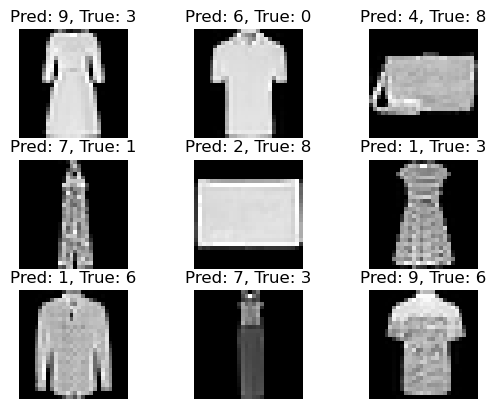

In [31]:
# Get predictions
model.eval()
images, labels = next(iter(test_loader))
predictions = model(images).argmax(dim=1)

# Plot 9 images
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {predictions[i]}, True: {labels[i]}")
    plt.axis('off')
plt.show()
